<a href="https://colab.research.google.com/github/mhdelta/machineLearningUtp/blob/master/finalMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Machine Learning
## Clasificación de radiografías para diagnóstico médico
#### El objetivo es clasificar entre: uestras normales, con pulmonía bacteriana o pulmonía viral.

Miguel Ángel Henao Pérez

https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [2]:
# Upload kagle.json --- in kaggle > account > generate api key
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:40<00:00, 23.4MB/s]
100% 2.29G/2.29G [00:41<00:00, 60.0MB/s]


In [15]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

In [43]:
# set directories
base_dir = 'chest_xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')

test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')

validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')

# check files
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_pneumonia_names = os.listdir(train_pneumonia_dir)
print(train_pneumonia_names[0:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

test_pneumonia_names = os.listdir(test_pneumonia_dir)
print(test_pneumonia_names[0:10])

validation_normal_names = os.listdir(validation_normal_dir)
print(validation_normal_names[:10])

validation_pneumonia_names = os.listdir(validation_pneumonia_dir)
print(validation_pneumonia_names[0:10])

['NORMAL2-IM-0678-0001.jpeg', 'IM-0227-0001.jpeg', 'IM-0766-0001.jpeg', 'IM-0577-0001.jpeg', 'NORMAL2-IM-0580-0001.jpeg', 'NORMAL2-IM-0997-0001.jpeg', 'NORMAL2-IM-1349-0001.jpeg', 'NORMAL2-IM-1162-0001.jpeg', 'NORMAL2-IM-0933-0001.jpeg', 'NORMAL2-IM-0506-0001.jpeg']
['person740_bacteria_2643.jpeg', 'person461_virus_949.jpeg', 'person1449_bacteria_3747.jpeg', 'person1488_virus_2587.jpeg', 'person1342_bacteria_3407.jpeg', 'person604_virus_1165.jpeg', 'person1600_virus_2777.jpeg', 'person626_virus_1202.jpeg', 'person793_virus_1424.jpeg', 'person97_virus_180.jpeg']
['NORMAL2-IM-0019-0001.jpeg', 'IM-0093-0001.jpeg', 'IM-0011-0001.jpeg', 'NORMAL2-IM-0028-0001.jpeg', 'NORMAL2-IM-0305-0001.jpeg', 'NORMAL2-IM-0310-0001.jpeg', 'IM-0025-0001.jpeg', 'IM-0033-0001-0002.jpeg', 'NORMAL2-IM-0045-0001.jpeg', 'NORMAL2-IM-0195-0001.jpeg']
['person16_virus_47.jpeg', 'person175_bacteria_833.jpeg', 'person147_bacteria_705.jpeg', 'person1662_virus_2875.jpeg', 'person85_bacteria_422.jpeg', 'person136_bacteria

In [44]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))

total training normal images: 1341
total training pneumonia images: 3875
total test normal images: 234
total test pneumonia images: 390
total validation normal images: 8
total validation pneumonia images: 8


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

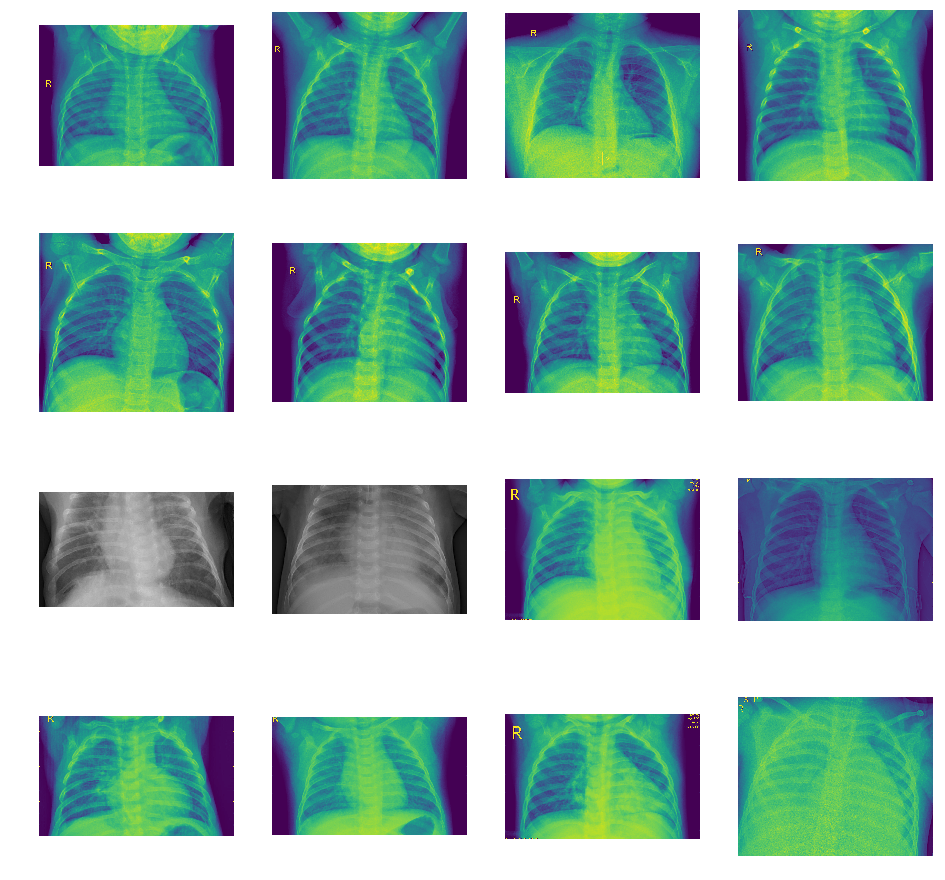

In [46]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [48]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0   

In [52]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [53]:
# DATA PREPROCESSING
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [55]:
#TRAIN
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 5216 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 16 images = batch_size * steps
      verbose=2)

Epoch 1/5
100/100 - 77s - loss: 0.1504 - acc: 0.9550 - val_loss: 0.5042 - val_acc: 0.7500
Epoch 2/5
100/100 - 76s - loss: 0.1329 - acc: 0.9539 - val_loss: 0.2535 - val_acc: 0.8750
Epoch 3/5
100/100 - 75s - loss: 0.1244 - acc: 0.9610 - val_loss: 0.3937 - val_acc: 0.8125
Epoch 4/5
100/100 - 75s - loss: 0.1036 - acc: 0.9670 - val_loss: 0.2758 - val_acc: 0.8750
Epoch 5/5
100/100 - 76s - loss: 0.0943 - acc: 0.9649 - val_loss: 0.4213 - val_acc: 0.7500


Text(0.5, 1.0, 'Training and validation loss')

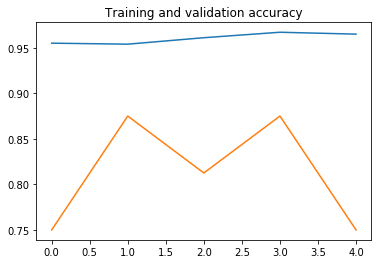

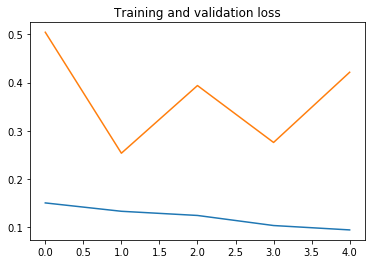

In [56]:
# loss analysis
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

NameError: ignored